In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('AirPassengers.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', 
                   parse_dates = True, 
                   index_col = 'Month',
                   date_parser = dateparse)
print(data.head())
# parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.
# index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.
# date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [4]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
ts = data['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [6]:
## Selecting by index
#1. Specific the index as a string constant:
print(ts['1949-01-01'])

#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
print(ts[datetime(1949,1,1)])

112
112


In [7]:
#1. Specify the entire range:
print(ts['1949-01-01':'1949-05-01'])

#2. Use ':' if one of the indices is at ends:
print(ts[:'1949-05-01'])
# Unlike numeric indexing, the end index is included here. For instance, if we index a list as a[:5] then it would return the values at indices – [0,1,2,3,4]. But here the index ‘1949-05-01’ was included in the output.
# The indices have to be sorted for ranges to work. If you randomly shuffle the index, this won’t work.

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


In [8]:
# Select by year
print(ts['1949'])
# Select by month
print(ts[ts.index.month==12])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64
Month
1949-12-01    118
1950-12-01    140
1951-12-01    166
1952-12-01    194
1953-12-01    201
1954-12-01    229
1955-12-01    278
1956-12-01    306
1957-12-01    336
1958-12-01    337
1959-12-01    405
1960-12-01    432
Name: #Passengers, dtype: int64


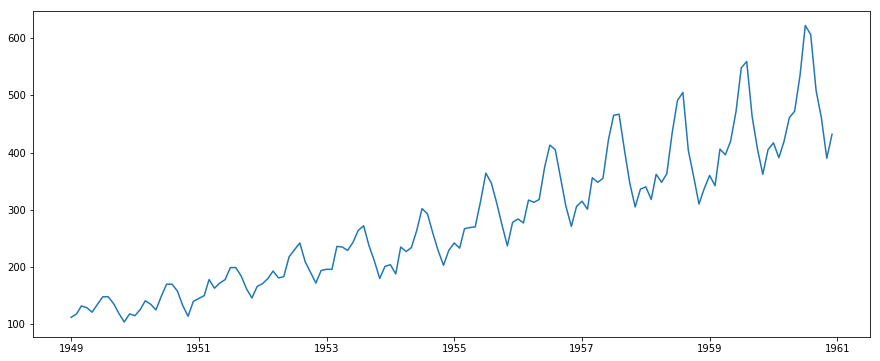

In [9]:
plt.plot(ts)

In [10]:
# Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. 
# By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. 
# last 12 months. But again this is more of a visual technique.

# Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. 
# Here the null hypothesis is that the TS is non-stationary. 
# The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 
# If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, win=12):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=win,center=False).mean()
    rolstd = timeseries.rolling(window=win,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

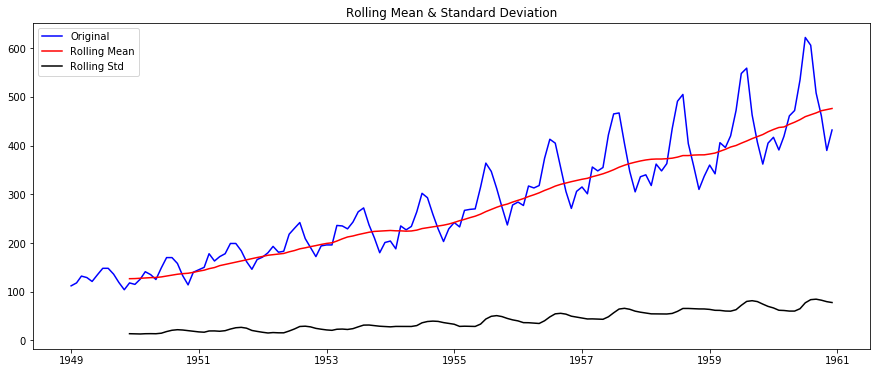

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [12]:
test_stationarity(ts)

## Eliminate Trend

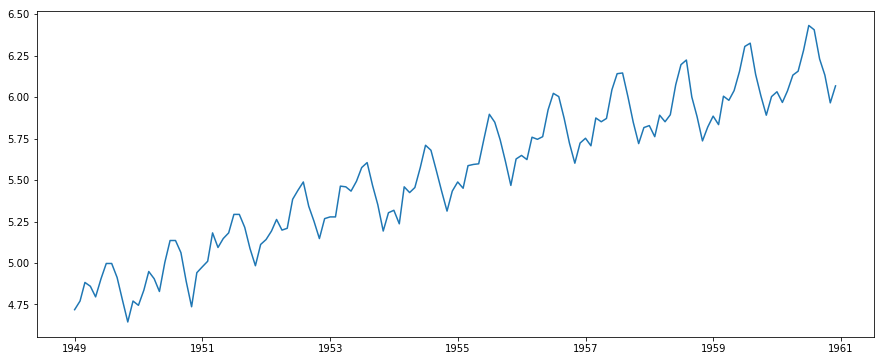

In [13]:
ts_log = np.log(ts)
plt.plot(ts_log)

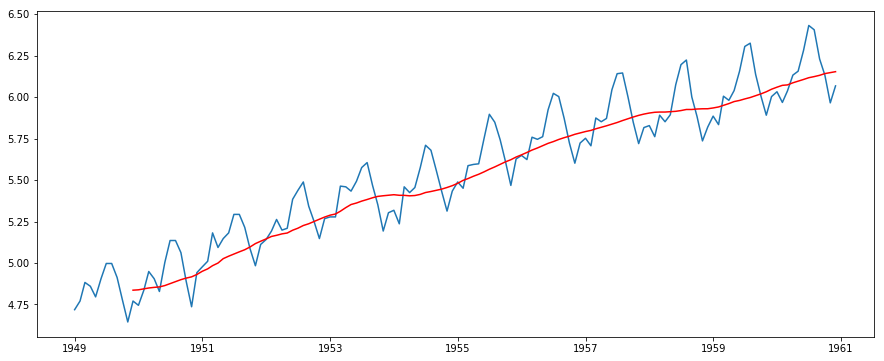

In [14]:
moving_avg = ts_log.rolling(window = 12, center = False).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [15]:
# The red line shows the rolling mean. Lets subtract this from the original series. 
# Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

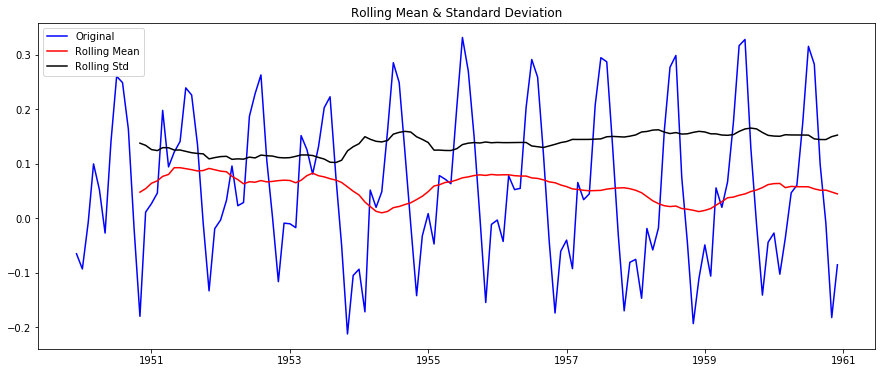

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [16]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

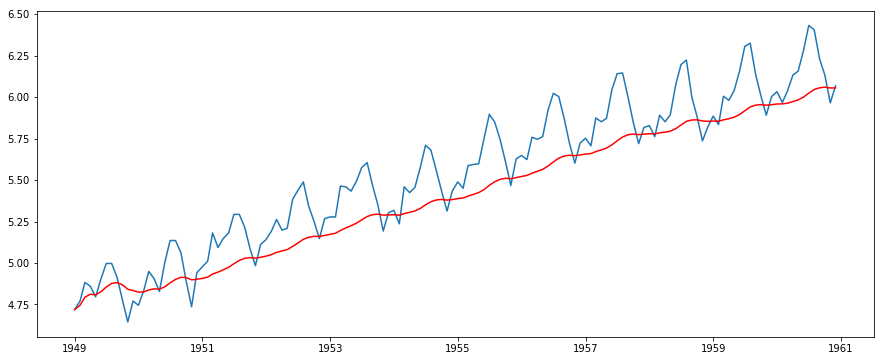

In [17]:
# However, a drawback in this particular approach is that the time-period has to be strictly defined. 
# In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. 
# So we take a ‘weighted moving average’ where more recent values are given a higher weight.
# Exponentially weighted moving average
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

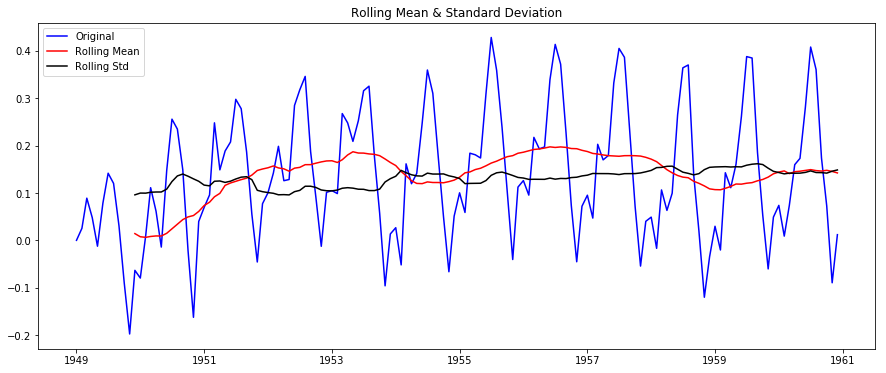

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [18]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

### Differencing – taking the differece with a particular time lag
### Decomposition – modeling both trend and seasonality and removing them from the model.

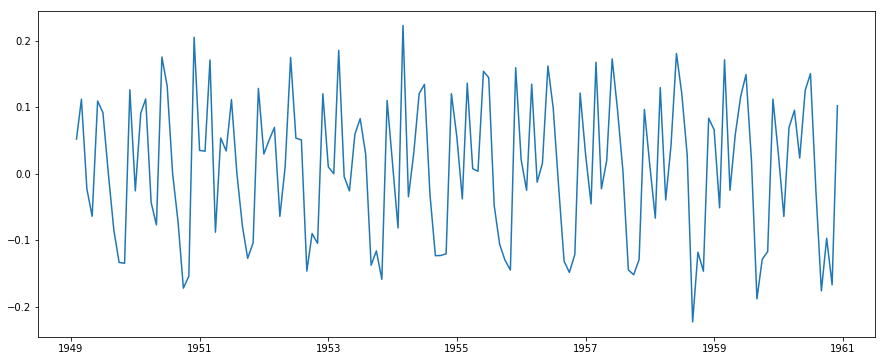

In [19]:
# One of the most common methods of dealing with both trend and seasonality is differencing. 
# In this technique, we take the difference of the observation at a particular instant with that at the previous instant. 
# This mostly works well in improving stationarity. First order differencing can be done in Pandas as:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

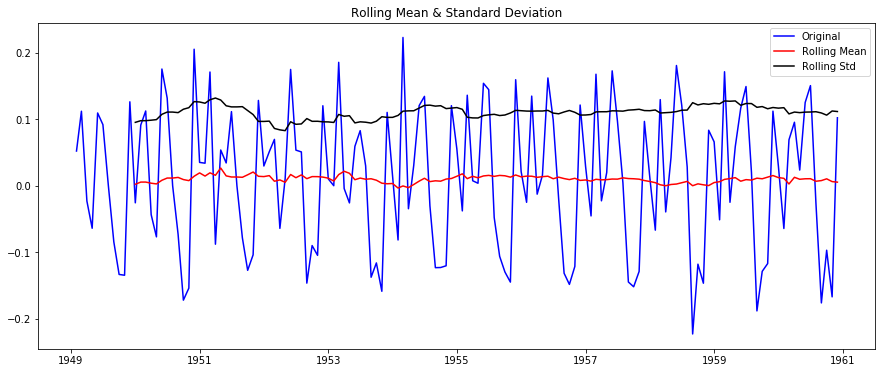

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [20]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

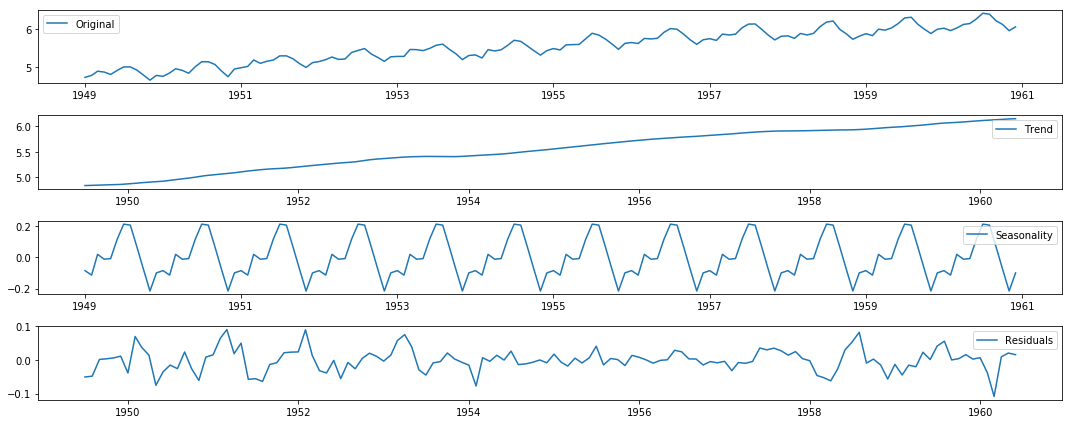

In [21]:
# Decomposing
# In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned.

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

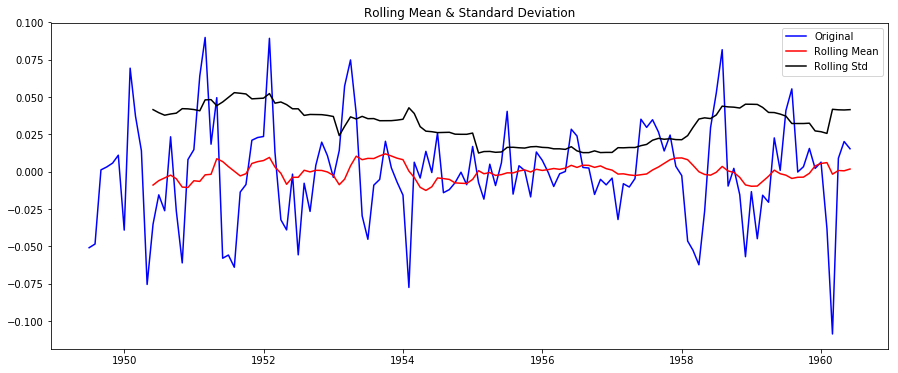

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [22]:
# Here we can see that the trend, seasonality are separated out from data and we can model the residuals. 
# Lets check stationarity of residuals:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

## Forecasting a Time Series

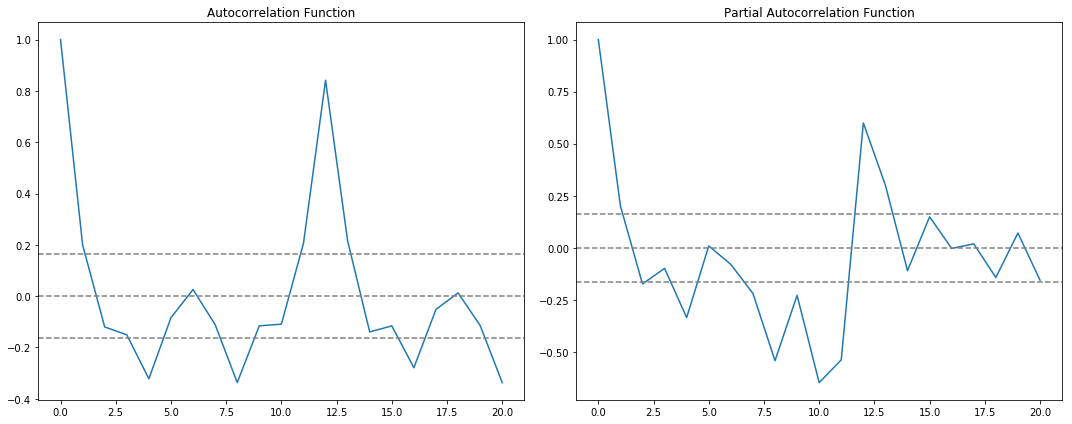

In [23]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

ts_log_diff = ts_log_diff.dropna()
lag_acf = acf(ts_log_diff, nlags=20)

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## Now, lets make 3 different ARIMA models considering individual as well as combined effects.

Text(0.5,1,'RSS: 1.5023')

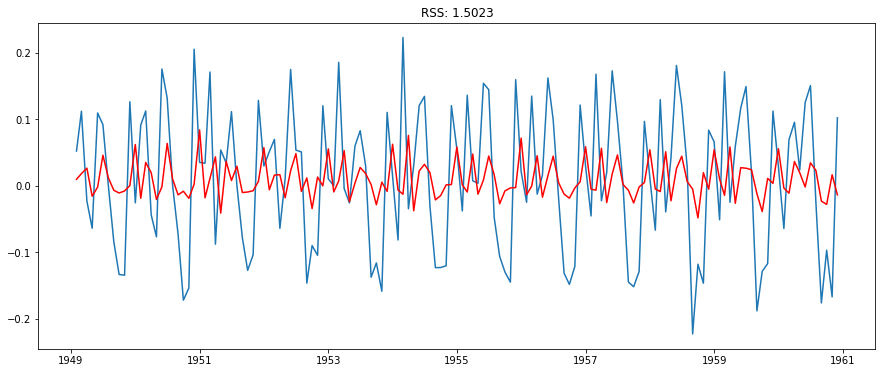

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1) # If True, convergence information is printed.
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 1.4721')

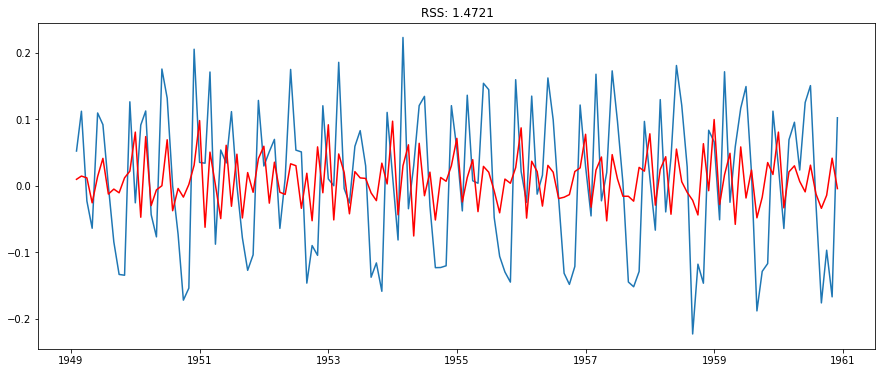

In [25]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 1.0292')

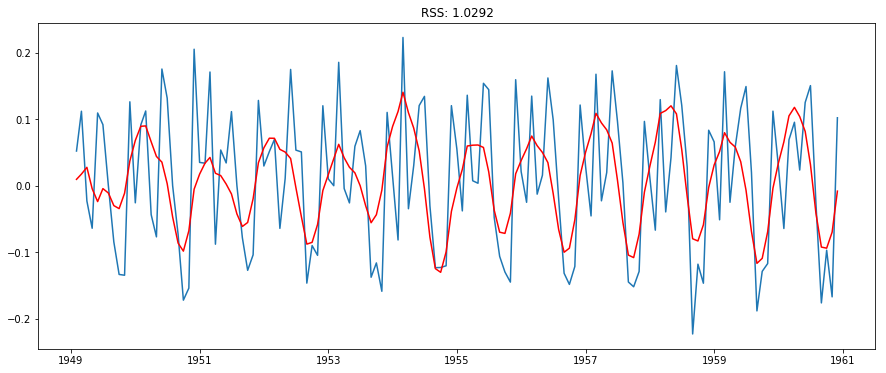

In [43]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [44]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [45]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [46]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5,1,'RMSE: 90.1047')

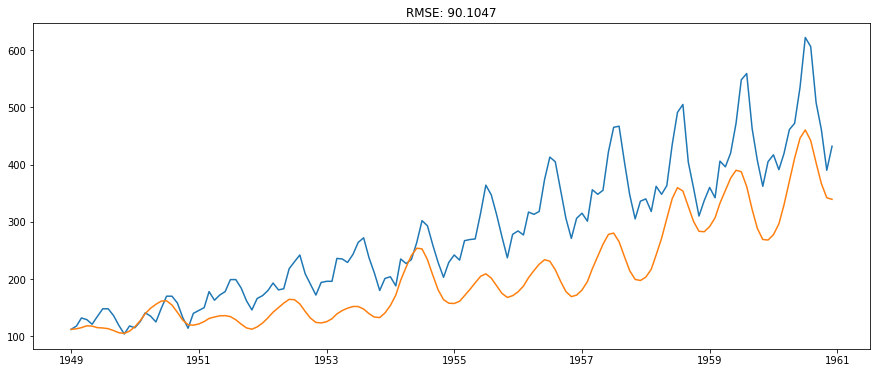

In [47]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

## Example

In [31]:
import statsmodels as sm
dta = sm.datasets.sunspots.load_pandas().data

In [32]:
dta.index = pd.Index(pd.date_range(start=pd.datetime(1700, 1, 1), end=pd.datetime(2008, 1, 1), 
                                   freq='AS'))
del dta["YEAR"]
activity = dta['SUNACTIVITY']

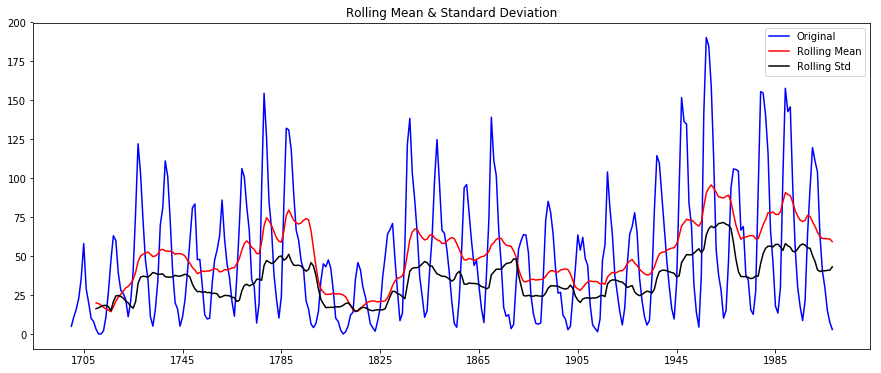

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


In [33]:
test_stationarity(activity, win=11)

In [34]:
activity[activity == 0] = np.exp(1)
activity_log = np.log(activity)

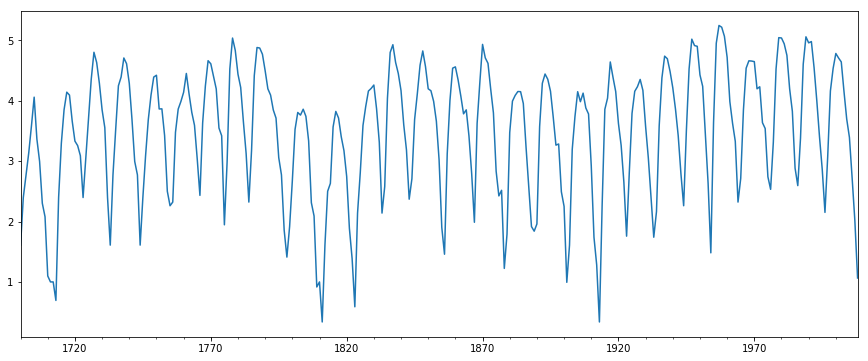

In [35]:
activity_log.plot()

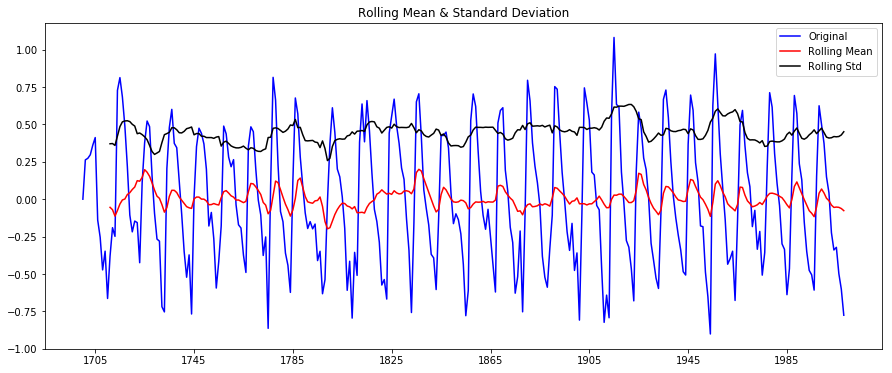

Results of Dickey-Fuller Test:
Test Statistic                -9.521812e+00
p-value                        3.050580e-16
#Lags Used                     8.000000e+00
Number of Observations Used    3.000000e+02
Critical Value (1%)           -3.452337e+00
Critical Value (5%)           -2.871223e+00
Critical Value (10%)          -2.571929e+00
dtype: float64


In [36]:
expweighted_avg = activity_log.ewm(halflife=1).mean()
activity_log_exp_diff = activity_log - expweighted_avg
test_stationarity(activity_log_exp_diff)

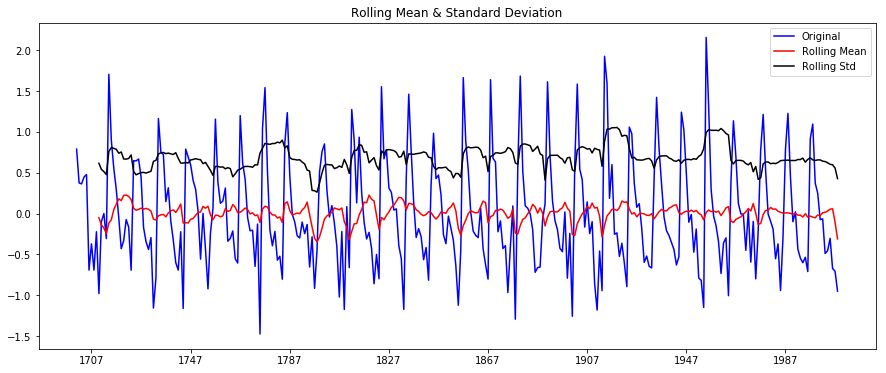

Results of Dickey-Fuller Test:
Test Statistic                -1.319094e+01
p-value                        1.144474e-24
#Lags Used                     8.000000e+00
Number of Observations Used    2.990000e+02
Critical Value (1%)           -3.452411e+00
Critical Value (5%)           -2.871255e+00
Critical Value (10%)          -2.571947e+00
dtype: float64


In [37]:
activity_log_diff = activity_log - activity_log.shift(1)
activity_log_diff.dropna(inplace=True)
test_stationarity(activity_log_diff, win=10)

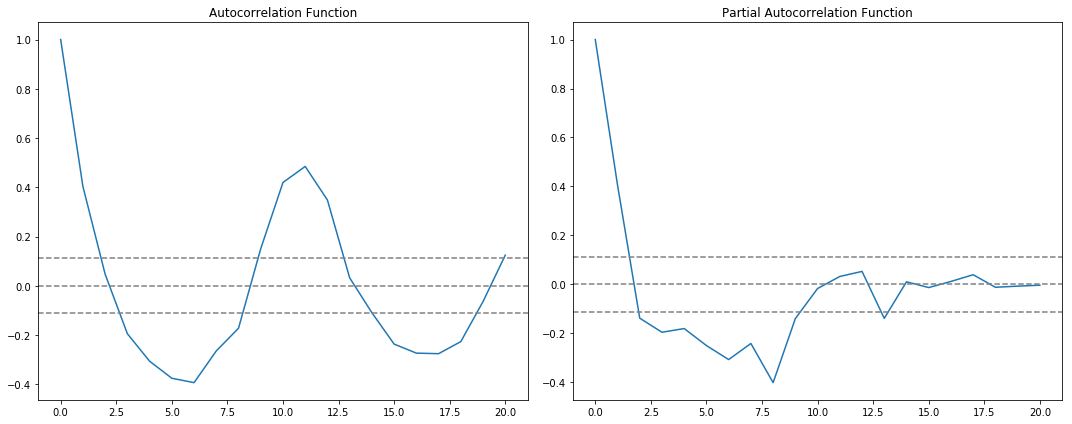

In [38]:
lag_acf = acf(activity_log_diff, nlags=20)

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(activity_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(activity_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

lag_pacf = pacf(activity_log_diff, nlags=20, method='ols')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(activity_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(activity_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5,1,'RSS: 112.6199')

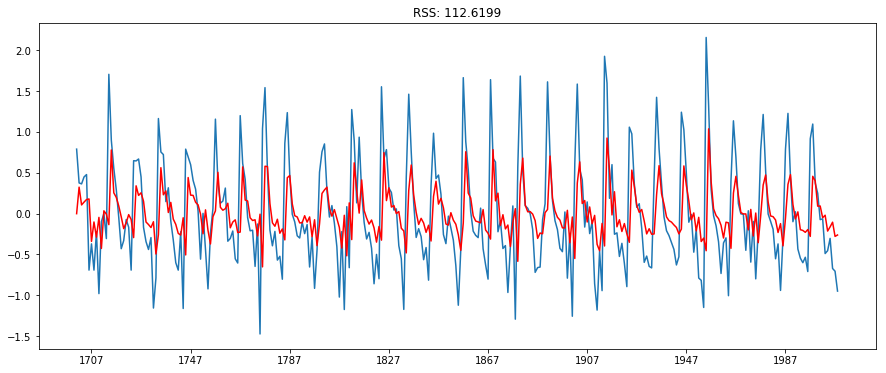

In [39]:
model = ARIMA(activity_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(activity_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-activity_log_diff)**2))

1701-01-01   -0.001980
1702-01-01    0.322912
1703-01-01    0.105244
1704-01-01    0.139959
1705-01-01    0.171303
Freq: AS-JAN, dtype: float64
1700-01-01    1.609438
1701-01-01    2.395916
1702-01-01    3.093521
1703-01-01    3.561671
1704-01-01    4.149655
Freq: AS-JAN, dtype: float64


Text(0.5,1,'RMSE: 89.0106')

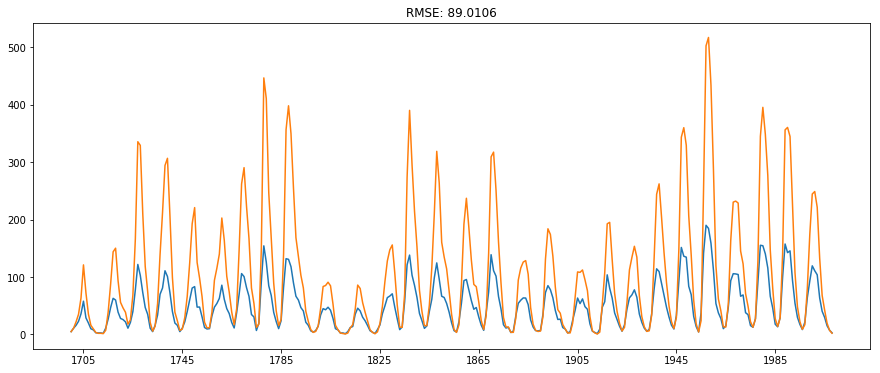

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())
# Cumulatitative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

# Add first value
predictions_ARIMA_log = pd.Series([activity_log.ix[i] for i in range(len(activity_log))], 
                                  index=activity_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head())

# Scale back
predictions_ARIMA = np.exp(predictions_ARIMA_log)

# Plot
plt.plot(activity)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-activity)**2)/len(activity)))

In [59]:
results_ARIMA.predict(pd.date_range(start=pd.datetime(2008, 1, 1), end=pd.datetime(2014, 1, 1)))

ValueError: Unknown string format

In [49]:
activity_log

1700-01-01    1.609438
1701-01-01    2.397895
1702-01-01    2.772589
1703-01-01    3.135494
1704-01-01    3.583519
1705-01-01    4.060443
1706-01-01    3.367296
1707-01-01    2.995732
1708-01-01    2.302585
1709-01-01    2.079442
1710-01-01    1.098612
1711-01-01    1.000000
1712-01-01    1.000000
1713-01-01    0.693147
1714-01-01    2.397895
1715-01-01    3.295837
1716-01-01    3.850148
1717-01-01    4.143135
1718-01-01    4.094345
1719-01-01    3.663562
1720-01-01    3.332205
1721-01-01    3.258097
1722-01-01    3.091042
1723-01-01    2.397895
1724-01-01    3.044522
1725-01-01    3.688879
1726-01-01    4.356709
1727-01-01    4.804021
1728-01-01    4.634729
1729-01-01    4.290459
                ...   
1979-01-01    5.046002
1980-01-01    5.040841
1981-01-01    4.944495
1982-01-01    4.752728
1983-01-01    4.198705
1984-01-01    3.826465
1985-01-01    2.884801
1986-01-01    2.595255
1987-01-01    3.380995
1988-01-01    4.607168
1989-01-01    5.060060
1990-01-01    4.960044
1991-01-01 